In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

# TEST

In [4]:
input_file = 'map_arrays/0.npy'

tensor = np.load(input_file)
print(tensor.shape)

(11, 16, 42)


In [5]:
flipped__vertically_tensor = np.flip(tensor, axis=0)
print(flipped__vertically_tensor.shape)

(11, 16, 42)


In [6]:
flipped_horizontally_tensor = np.flip(tensor, axis=1)
print(flipped_horizontally_tensor.shape)

(11, 16, 42)


# DATA AUGMENTATION
semplice flip orizzontale e verticale del tensore 11x16x42

In [14]:
output_path = 'dataset'
input_path = 'map_arrays'

if not os.path.exists(output_path):
    os.makedirs(output_path)

# Process each image in the folder
for filename in os.listdir(input_path):
    tensor_path = os.path.join(input_path, filename)
    tensor = np.load(tensor_path)

    flipped_vertically_tensor = np.flip(tensor, axis=0)
    flipped_horizontally_tensor = np.flip(tensor, axis=1)
    
    np.save(os.path.join(output_path, filename), tensor)
    np.save(os.path.join(output_path, 'fv' + filename), flipped_vertically_tensor)
    np.save(os.path.join(output_path, 'fh' + filename), flipped_horizontally_tensor)
        

# VERIFY

In [15]:
tile_set_path = 'gray_tile'
tile_size = 16
tile_set = []
for filename in os.listdir(tile_set_path):
    tile = np.load(os.path.join(tile_set_path, filename))
    tile_set.append(tile)

In [16]:
def convert_embedding_to_image(embedding, tile_set, tile_size):
    num_tiles_h, num_tiles_w, _ = embedding.shape
    # Initialize the image with the appropriate dimensions
    reconstructed_image = np.zeros((num_tiles_h * tile_size, num_tiles_w * tile_size), dtype=tile_set[0].dtype)
    
    # Loop through each position in the embedding array
    for i in range(num_tiles_h):
        for j in range(num_tiles_w):
            # Find the index of the tile (one-hot encoding)
            tile_index = np.argmax(embedding[i, j])
            # Retrieve the tile from the tile set
            tile = tile_set[tile_index]
            # Place the tile in the correct position in the reconstructed image
            reconstructed_image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = tile

    return reconstructed_image

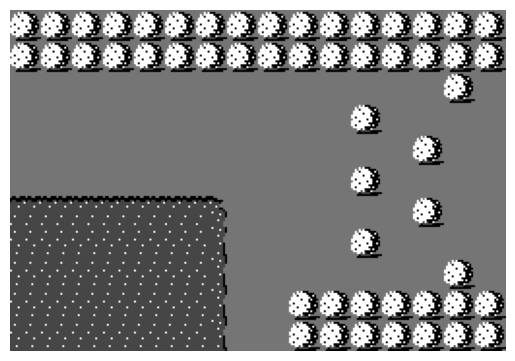

In [17]:
test_img = convert_embedding_to_image(tensor, tile_set, tile_size)
# Plot the image using matplotlib
plt.imshow(test_img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

In [18]:
output_path = 'dataset'
input_path = 'map_arrays'

normal_np = np.load(os.path.join(output_path, '127.npy'))
fv_np = np.load(os.path.join(output_path, 'fv127.npy'))
fh_np = np.load(os.path.join(output_path, 'fh127.npy'))

In [19]:
normal = convert_embedding_to_image(normal_np, tile_set, tile_size)
fv = convert_embedding_to_image(fv_np, tile_set, tile_size)
fh = convert_embedding_to_image(fh_np, tile_set, tile_size)

In [20]:
normal_img = Image.fromarray(normal)
fv_img = Image.fromarray(fv)
fh_img = Image.fromarray(fh)

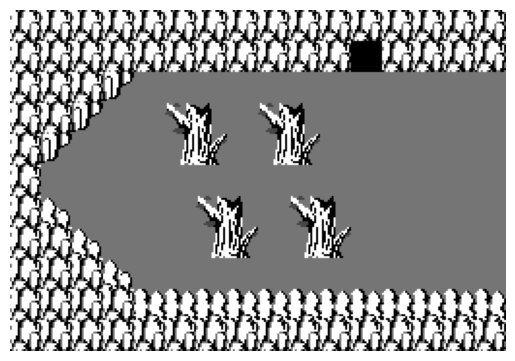

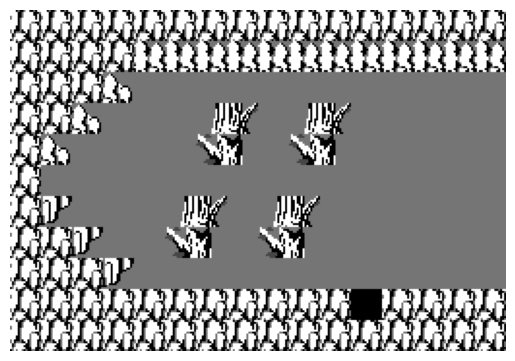

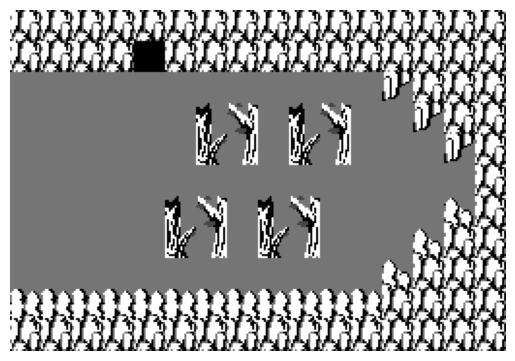

In [21]:
# Plot the image using matplotlib
plt.imshow(normal_img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()

plt.imshow(fv_img, cmap='gray')

plt.axis('off')  # Hide the axis
plt.show()

plt.imshow(fh_img, cmap='gray')
plt.axis('off')  # Hide the axis
plt.show()